In [28]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from numpy import asarray
from sklearn.ensemble import IsolationForest

In [19]:
df = pd.read_csv("./data/Monthly beer production in Australia megalitres Includes ale and stout.csv",index_col=0)

In [20]:
df.head()

,x
1,93.2
2,96.0
3,95.2
4,77.1
5,70.9


In [21]:
n_vars = 1 if type(df) is list else df.shape[1]
cols = list()
SHIFT = 12
for i in range(SHIFT, 0, -1):
    cols.append(df.shift(i))
for i in range(0, 1):
    cols.append(df.shift(-i))
# put it all together
agg = pd.concat(cols, axis=1)
agg.dropna(inplace=True)
list_for_forecast = agg.values

In [22]:
def random_forest_forecast(train, testX):
    train = asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]

In [ ]:
predictions = list()
size = int(len(list_for_forecast) * 0.8)
train, test = list_for_forecast[0:size], list_for_forecast[size:len(list_for_forecast)]
history = [x for x in train]

print(f"Total points: {len(test)}")

for i in range(len(test)):
    print(f"Step {i+1}")
    testX, testy = test[i, :-1], test[i, -1]
    yhat = random_forest_forecast(history, testX)
    predictions.append(yhat)
    history.append(test[i])


In [25]:
print("Random Forest metrics: ")
print("RMSE:", np.sqrt(mean_squared_error(test[:, -1], predictions)))
print("MAPE:", mean_absolute_percentage_error(test[:, -1], predictions))
print("MAE:", mean_absolute_error(test[:, -1], predictions))
print("R2: ", r2_score(test[:, -1], predictions))

Random Forest metrics: 
RMSE: 10.885910775944678
MAPE: 0.05804312612679475
MAE: 8.789605376344081
R2:  0.7587327412421292


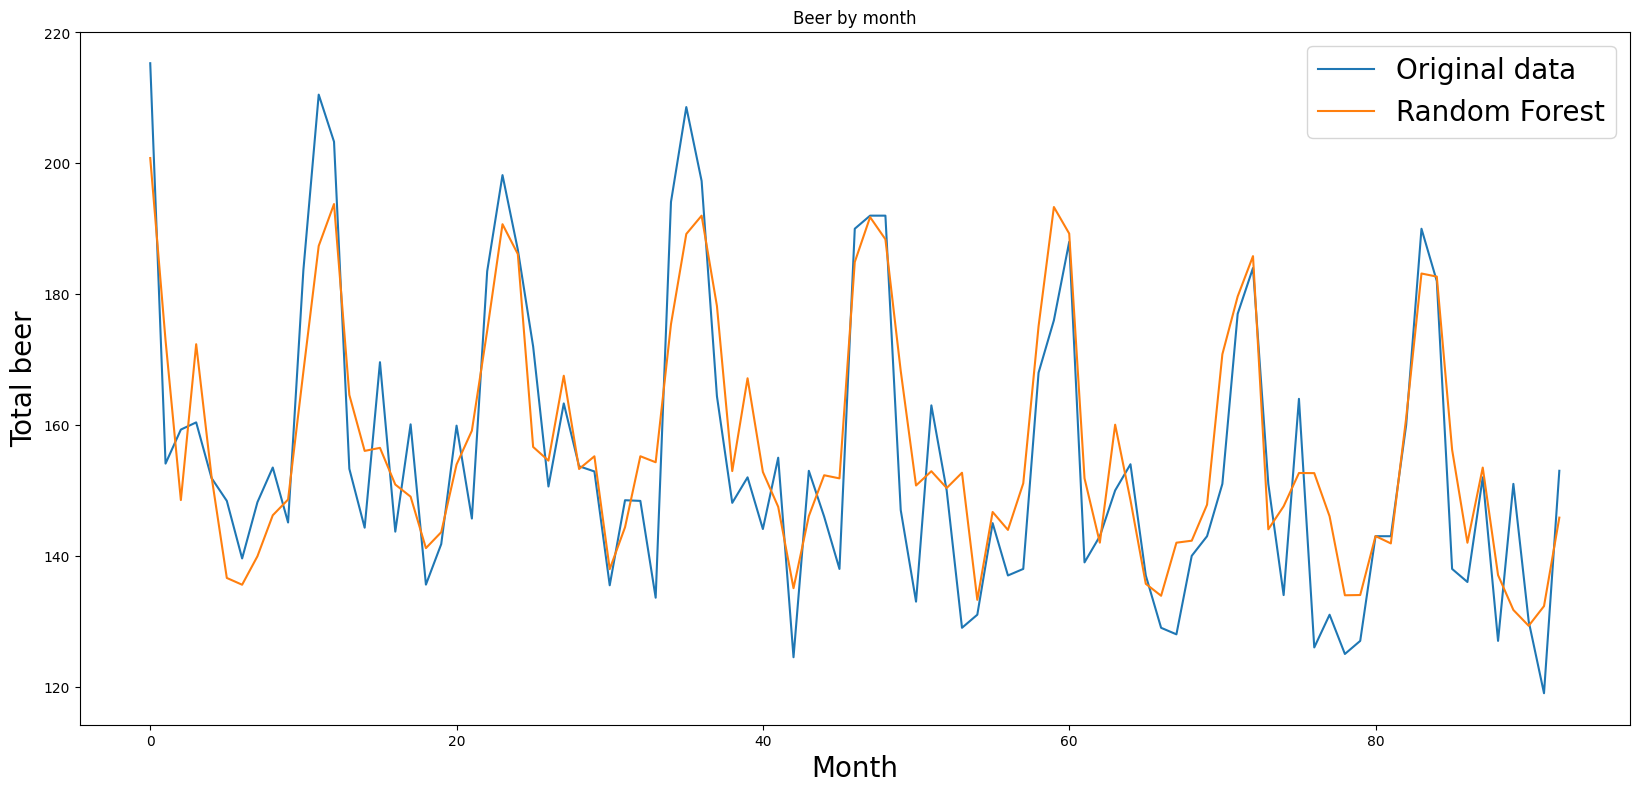

In [27]:
fig = plt.figure(figsize=(20, 9))
plt.plot(test[:, -1], label='Original data')
plt.plot(predictions, label='Random Forest')
plt.legend(fontsize="20")
plt.title('Beer by month')
plt.ylabel('Total beer', fontsize="20")
plt.xlabel('Month', fontsize="20")
plt.show()

In [29]:
model = IsolationForest(contamination=0.004)
model.fit(df[['x']])

IsolationForest(contamination=0.004)

In [30]:
df['outliers'] = pd.Series(model.predict(df[['x']])).apply(lambda x: 1 if (x == -1) else 0 )

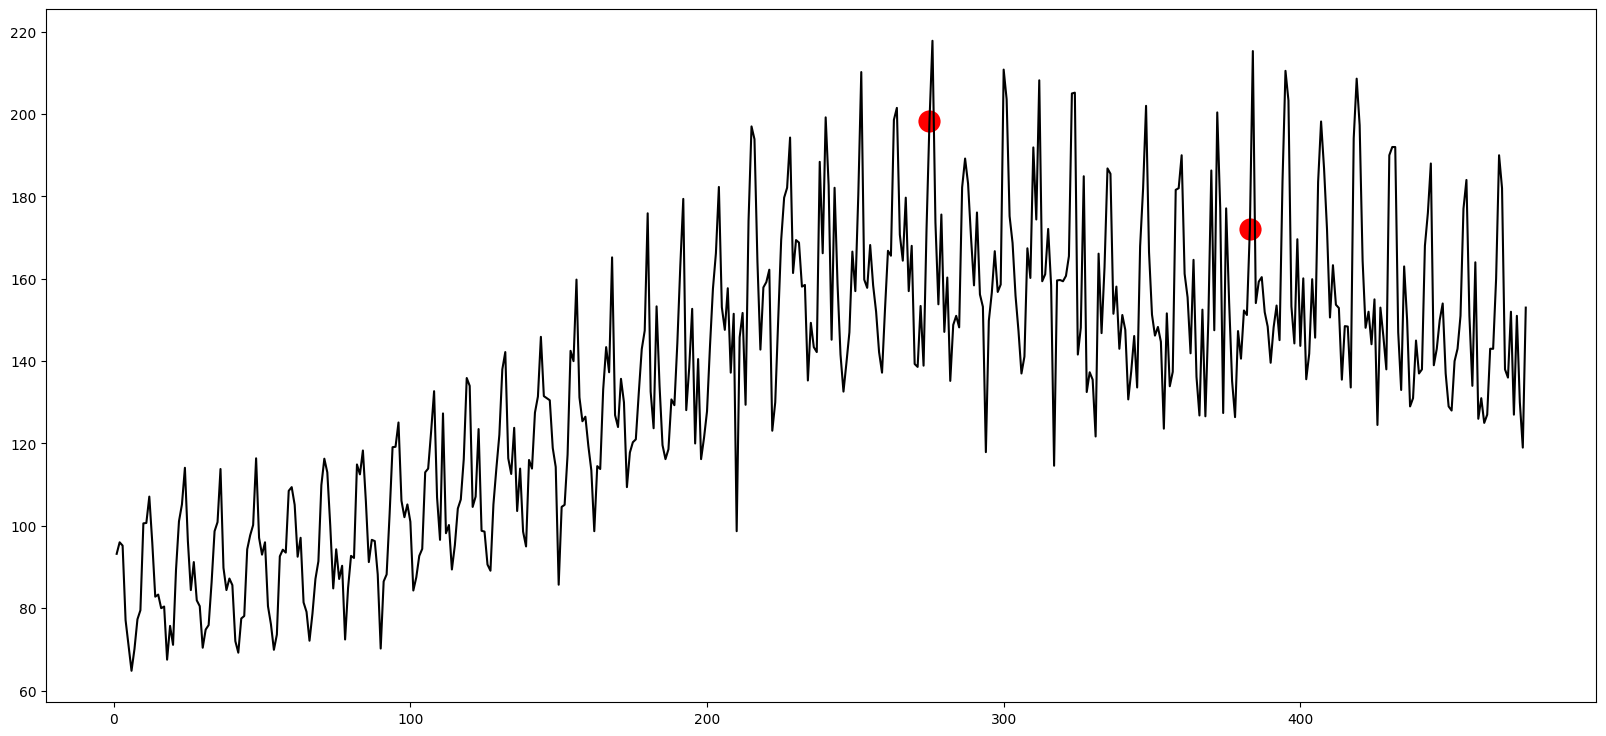

In [32]:
fig, ax = plt.subplots(figsize=(20,9))
ax.plot(df.index,df.x, color="black")
ax.scatter(x=df[df["outliers"]==1].index,y=df[df["outliers"]==1]["x"], color="red", linewidths=10)